# Waveguide modes
Light travelling down a dielectric waveguide is confined by total internal reflection.  The distribution (shape) of the light within the waveguide is governed by a set of differential equations known as Maxwell's equations.   Similar to how Newton's laws of motion determine the shape of the vibrational waves on a violin string or an organ pipe, Maxwell's equations determine the shape of the light waves in a waveguide.  

A stationary distribution of light in the waveguide (one that doesn't change as the light propagates) is called a mode.  Let's plot an example of some waveguide modes.  We will use the electromagnetic solver MPB to solve for the modes of a dielectric waveguide.

First we import the necessary modules, including the mode simulation tools built into gdsfactory.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import meep as mp
import gdsfactory.simulation.modes as gm

Next, we'll define the geometry and material of our waveguide.  We'll choose a waveguide width of 0.75 microns and a waveguide thickness of 0.5 microns.  The waveguide will be made of silicon, with a refractive index of 3.47, and it will be surrounded (clad) by glass with a refractive index of 1.44.  We'll use the command "find_modes_waveguide" to calculate 4 different modes.  Each one will be returned as a mode object.

In [43]:
modes = gm.find_modes_waveguide(
    parity=mp.NO_PARITY,
    wg_width=0.75,
    ncore=3.47,
    nclad=1.44,
    wg_thickness=0.5,
    resolution=128,
    sy=3,
    sz=3,
    nmodes=4,
)
m1 = modes[1]
m2 = modes[2]
m3 = modes[3]
m4 = modes[4]

2023-04-25 16:39:34.690 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/Users/ryancamacho/gdsfactory/envs/photonics_bootcamp/lib/python3.10/site-packages/gdsfactory/typings.py:301: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(val, dtype=cls.inner_type)


Now let's plot these modes.  First we'll plot the y-component of the elecgtric field of mode 1 and mode 4.

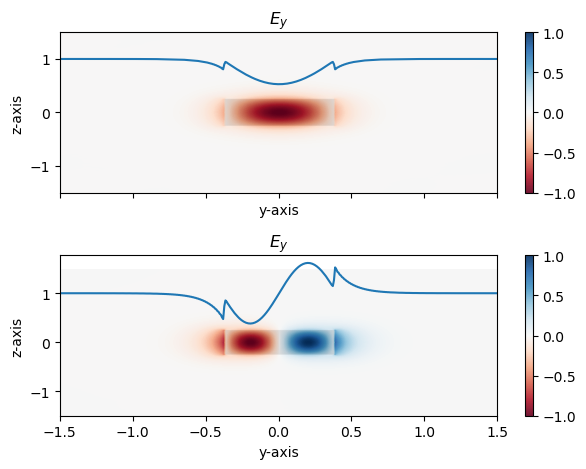

In [44]:

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
islice = int(len(m1.y)/2)

plt.axes(ax1)
m1.plot_eps(alpha = 1.0, show =False, colorbar = False)
m1.plot_ey(alpha = 0.90, scale=True, show = False)
plt.plot(m1.y, m1.E[:, islice, 0, 1] + 1.0)

plt.axes(ax2)
m1.plot_eps(alpha = 1.0, show =False, colorbar = False)
m4.plot_ey(alpha = 0.90, scale = True, show = False)
plt.plot(m4.y, m4.E[:, islice, 0, 1] + 1.0)

plt.tight_layout()
plt.show()



Let's walk through some of the visual features of these modes.  

1. The first thing to notice is that, just like a violin string, there exists a fundamental mode and higher order modes.  The mode in the upper plot is the fundamental, or 0th order mode.  It has a half-wave distributed along the y-axis inside the waveguide.  The mode in the lower plot is the 1st order mode.  It has a full wavelength distributed along the y-axis inside the waveguide.  Notice that the x-axis is out of the page.  In general, inside the waveguide the spatial distribution of the mode will have a sinusoidal dependence, and the mode order is determined by the number of half waves contained in the waveguide.

2. The second thing to notice is that the mode also has non-zero electric field *outside* of the waveguide.  This part of the mode is called the evanescent field, and decays exponentially.  In order to visualize both the sinusoidal and exponentially decaying parts of the modes, a slice of the mode is also plotted in blue just above the waveguide.  This slice is the magnitude of the electric field, which can be positive and negative, at $z=0$.

3. The third thing to notice is that the electric field is discontinuous in the y-direction when it crosses a dielectric interface.  This turns out to be a boundary condition that is a fundamental property of Maxwell's equations, but depends on the direction the field is pointing.  Any component of the field perpindicular to the boundary will be discontinous, and any component of the field parallel to the boundar will be continuous.  Since we have plotted just the y-component of the field, it is discontinuous when it crosses vertical boundaries, but continous when it crosses horizontal boundaries.

Modes that are dominately polarized in the y-direction are called transverse electric (TE) modes.  TE modes are polarized parallel to the substrate and perpindicular (transverse) to the direction of propagation. 

Now let's plot the electric field mode 1 and mode 3, which are mostly polarized in the z-direction:




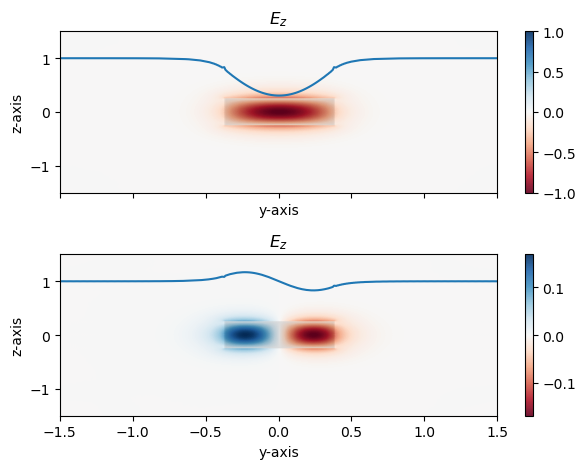

In [45]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
islice = int(len(m1.z)/2)

plt.axes(ax1)
m2.plot_eps(alpha = 1.0, show =False, colorbar = False)
m2.plot_ez(alpha = 0.90, scale=True, show = False)
plt.plot(m2.z, m2.E[:, islice, 0, 2] + 1.0)

plt.axes(ax2)
m3.plot_eps(alpha = 1.0, show =False, colorbar = False)
m3.plot_ez(alpha = 0.90, scale = False, show = False)
plt.plot(m3.z, m3.E[:, islice, 0, 2] + 1.0)

plt.tight_layout()
plt.show()

Notice that the slice of the electric field through $z = 0$ is now continuous at the boundaries.  You can also see a slight numerical error at the boundary that arises from the finite resolution of the mode solver.